<a href="https://colab.research.google.com/github/jazaineam1/BigData2023_2/blob/main/2_BigData_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Arquitectura Empresarial y Ciclo de vida de los Datos***

## ***Universidad Central***
>## **Facultad de Ingeniería y Ciencias Básicas.**
>## ***Maestría en analítica de datos***
![Imágen1](https://www.ucentral.edu.co/themes/ucentral/img/template/Universidad%20Central.png)


>## ***Big Data.***
>## ***Docente: Antonino Zainea Maya.***

## ¿Qué es un API?


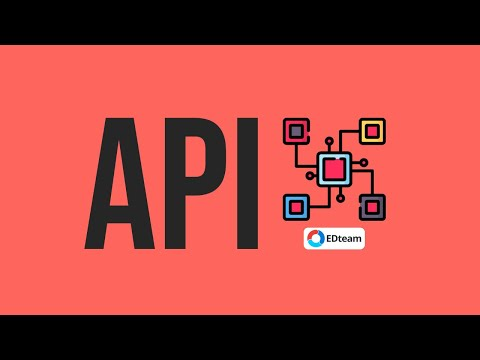

In [ ]:
from IPython.display import YouTubeVideo
video_id = "u2Ms34GE14U"
YouTubeVideo(video_id, width=560, height=315)



### Introducción a la API de Socrata

La API de Socrata, conocida como Socrata Open Data API (SODA), te permite consultar conjuntos de datos alojados en plataformas Socrata. Con esta API, puedes realizar operaciones como leer datos, filtrarlos y realizar consultas más complejas. Los datos se pueden devolver en varios formatos, incluyendo JSON, XML y CSV.

### Paso 1: Encuentra el Conjunto de Datos

Antes de poder realizar una consulta, necesitas encontrar el conjunto de datos con el que deseas trabajar. Este tutorial asume que ya has encontrado un conjunto de datos en una plataforma Socrata que te interesa. Cada conjunto de datos tiene una URL base única, que necesitarás para tus consultas.
Aquí tienes ejemplos de cómo podrías usar cada una de estas funciones de la API de Socrata (SODA) en tus consultas.

### $select

Selecciona las columnas `nombre_de_la_entidad` y `estado_del_proceso` del conjunto de datos:

```
https://www.datos.gov.co/resource/rpmr-utcd.json?$select=nombre_de_la_entidad,estado_del_proceso
```

### $where

Filtra para obtener solo las filas donde `estado_del_proceso` sea 'BORRADOR':

```
https://www.datos.gov.co/resource/rpmr-utcd.json?$where=estado_del_proceso='BORRADOR'
```

### $order

Ordena los resultados por la columna `valor_contrato` en orden descendente:

```
https://www.datos.gov.co/resource/rpmr-utcd.json?$order=valor_contrato DESC
```

### $group

Agrupa los resultados por la columna `departamento_entidad`:

```
https://www.datos.gov.co/resource/rpmr-utcd.json?$select=departamento_entidad,count(*)&$group=departamento_entidad
```

### $having

Filtra los grupos teniendo más de 10 contratos:

```
https://www.datos.gov.co/resource/rpmr-utcd.json?$select=departamento_entidad,count(*) as num_contratos&$group=departamento_entidad&$having=num_contratos > 10
```

### $limit

Limita los resultados a solo 5 filas:

```
https://www.datos.gov.co/resource/rpmr-utcd.json?$limit=5
```

### $offset

Comienza a devolver los resultados a partir de la fila número 10:

```
https://www.datos.gov.co/resource/rpmr-utcd.json?$offset=10
```

### $q

Realiza una búsqueda de texto completo en todas las columnas por la palabra 'OBRA':

```
https://www.datos.gov.co/resource/rpmr-utcd.json?$q=OBRA
```

### $query

Realiza una consulta completa, combinando múltiples operaciones (Nota: `$query` no siempre está soportado en todos los endpoints de Socrata):

```
https://www.datos.gov.co/resource/rpmr-utcd.json?$query=SELECT nombre_de_la_entidad, valor_contrato WHERE estado_del_proceso='CONVOCADO' ORDER BY valor_contrato DESC LIMIT 10
```

Recuerda que estos ejemplos están diseñados para ser utilizados tal como están en la URL del navegador o dentro de una solicitud HTTP en una herramienta de desarrollo de API o en código.

Revisa la siguiente documentación https://dev.socrata.com/docs/queries/

Desde python:



In [ ]:
%%capture
pip install sodapy

In [ ]:
import pandas as pd
from sodapy import Socrata

# Inicializa el cliente Socrata
client = Socrata("www.datos.gov.co", None)


In [ ]:

# $select
# Selecciona columnas específicas
results_select = client.get("rpmr-utcd", select="nombre_de_la_entidad, estado_del_proceso", limit=10000)
df_select = pd.DataFrame.from_records(results_select)
display(df_select)


,nombre_de_la_entidad,estado_del_proceso
0,CESAR GOBERNACION,BORRADOR
1,BOYACA ALCALDIA MUNICIPIO DE SAMACA,ADJUDICADO
2,SANTANDER GOBERNACION,ADJUDICADO
3,EJERCITO NACIONAL,ADJUDICADO
4,SERVICIO NACIONAL DE APRENDIZAJE SENA,ADJUDICADO
...,...,...
9995,SANTANDER INSPECCION DE TRANSITO Y TRANSPORTE...,TERMINADO ANORMALMENTE DESPUES DE CONVOCADO
9996,INSTITUTO DE SEGURO SOCIAL,BORRADOR
9997,ANTIOQUIA ALCALDIA MUNICIPIO DE ANZA,TERMINADO ANORMALMENTE DESPUES DE CONVOCADO
9998,CORDOBA ALCALDIA MUNICIPIO DE TIERRALTA,CONVOCADO


In [ ]:

# $where
# Filtra resultados basados en una condición específica
results_where = client.get("rpmr-utcd", where="estado_del_proceso='BORRADOR'", limit=10000)
df_where = pd.DataFrame.from_records(results_where)
display(df_where)

,nivel_entidad,nombre_de_la_entidad,nit_de_la_entidad,departamento_entidad,municipio_entidad,estado_del_proceso,modalidad_de_contrataci_n,objeto_a_contratar,objeto_del_proceso,tipo_de_contrato,tipo_contrato,numero_del_contrato,numero_de_proceso,valor_contrato,nom_raz_social_contratista,url_contrato,origen,documento_proveedor
0,TERRITORIAL,HUILA GOBERNACION,800103913,HUILA,NEIVA,BORRADOR,CONTRATACION DIRECTA MENOR CUANTIA,NO DEFINIDO,COMPRA DE ELEMENTOS PARA DOTAR EL CENTRO MEDIC...,COMPRAVENTA,COMPRAVENTA,NO DEFINIDO,05-2-7055,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
1,TERRITORIAL,CUNDINAMARCA GOBERNACION,899999114,BOGOTA DC,BOGOTA DC,BORRADOR,SELECCION ABREVIADA DE MENOR CUANTIA LEY 1150 ...,NO DEFINIDO,SE�ALIZACION VIAL ZONA URBANA Y RURAL PARA LOS...,OBRA,OBRA,NO DEFINIDO,10-11-424473,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
2,TERRITORIAL,CESAR ALCALDIA MUNICIPIO DE PAILITAS,891180194-4,CESAR,PAILITAS,BORRADOR,SELECCION ABREVIADA DE MENOR CUANTIA LEY 1150 ...,NO DEFINIDO,COMPRA DE CAMIONETA,COMPRAVENTA,COMPRAVENTA,NO DEFINIDO,08-11-106880,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
3,TERRITORIAL,RISARALDA ALCALDIA MUNICIPIO DE DOSQUEBRADAS,890984043-8,RISARALDA,DOSQUEBRADAS,BORRADOR,SELECCION ABREVIADA DE MENOR CUANTIA LEY 1150 ...,NO DEFINIDO,LA CONSTRUCCION DE LA CASETA COMUNAL DEL BARRI...,OBRA,OBRA,NO DEFINIDO,09-11-281482,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
4,TERRITORIAL,ANTIOQUIA INDER ENVIGADO INSTITUTO DE DEPORT...,811016337,ANTIOQUIA,ENVIGADO,BORRADOR,SUBASTA,NO DEFINIDO,SUMINISTRO DE ELEMENTOS DE ASEO PARA LA PRESEN...,SUMINISTRO,SUMINISTRO,NO DEFINIDO,11-9-281503,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TERRITORIAL,TOLIMA ALCALDIA MUNICIPIO DE FALAN,800100054,TOLIMA,FALAN,BORRADOR,LICITACION PUBLICA,NO DEFINIDO,MANUAL DE CONTRTACION,PRESTACION DE SERVICIOS,PRESTACION DE SERVICIOS,NO DEFINIDO,14-1-123191,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
9996,TERRITORIAL,HUILA ALCALDIA MUNICIPIO DE BARAYA,891180183,HUILA,BARAYA,BORRADOR,CONCURSO DE MERITOS ABIERTO,NO DEFINIDO,REALIZAR LA INTERVENTORIA TECNICA ADMINISTRATI...,INTERVENTORIA,INTERVENTORIA,NO DEFINIDO,15-15-3917881,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
9997,NACIONAL,CARDER CORPORACION AUTONOMA REGIONAL DE RISAR...,891410354,RISARALDA,PEREIRA,BORRADOR,SUBASTA,NO DEFINIDO,ADQUISICION DE EQUIPOS PARA EL SISTEMA DE VIGI...,OTRO TIPO DE CONTRATO,OTRO TIPO DE CONTRATO,NO DEFINIDO,15-9-405399,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
9998,TERRITORIAL,NORTE DE SANTANDER IFINORTE,NO DEFINIDO,NORTE DE SANTANDER,SAN JOSE DE CUCUTA,BORRADOR,CONCURSO DE MERITOS ABIERTO,NO DEFINIDO,SELECCIONAR UN SOCIO OPERADOR PARA QUE BAJO SU...,OTRO TIPO DE CONTRATO,OTRO TIPO DE CONTRATO,NO DEFINIDO,15-15-4362872,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO


In [ ]:

# $order
# Ordena los resultados por una columna específica
results_order = client.get("rpmr-utcd", order="valor_contrato DESC", limit=10000)
df_order = pd.DataFrame.from_records(results_order)
df_order

,nivel_entidad,nombre_de_la_entidad,nit_de_la_entidad,departamento_entidad,municipio_entidad,estado_del_proceso,modalidad_de_contrataci_n,objeto_a_contratar,objeto_del_proceso,tipo_de_contrato,tipo_contrato,numero_del_contrato,numero_de_proceso,valor_contrato,nom_raz_social_contratista,url_contrato,origen,documento_proveedor
0,TERRITORIAL,ATLANTICO ESE HOSPITAL LOCAL DE LURUACO,890103025,ATLANTICO,LURUACO,CONVOCADO,REGIMEN ESPECIAL,NO DEFINIDO,PRESTACION DE SERVICIOS DE APOYO A LA GESTION ...,PRESTACION DE SERVICIOS,PRESTACION DE SERVICIOS,NO DEFINIDO,20-4-11452712,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
1,TERRITORIAL,AMAZONAS ALCALDIA MUNICIPIO DE PUERTO NARI�O,890981000-8,AMAZONAS,PUERTO NARI�O,CONVOCADO,CONTRATACION DIRECTA LEY 1150 DE 2007,NO DEFINIDO,PRESTACION DE SERVICIOS PROFESIONALES PARA EL ...,PRESTACION DE SERVICIOS,PRESTACION DE SERVICIOS,NO DEFINIDO,21-12-11663163,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
2,TERRITORIAL,CALDAS HOSPITAL SAN FELIX DE LA DORADA,NO DEFINIDO,CALDAS,LA DORADA,TERMINADO ANORMALMENTE DESPUES DE CONVOCADO,LICITACION PUBLICA,NO DEFINIDO,ESTUDIOS Y DOCUMENTOS PREVIOS PARA LA CELABRAC...,PRESTACION DE SERVICIOS,PRESTACION DE SERVICIOS,NO DEFINIDO,18-1-189298,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
3,TERRITORIAL,CHOCO ALCALDIA MUNICIPIO DE SAN JOSE DEL PALMAR,NO DEFINIDO,CHOCO,SAN JOSE DEL PALMAR,DESCARTADO,SELECCION ABREVIADA DE MENOR CUANTIA LEY 1150 ...,NO DEFINIDO,SUMINISTRO DE MATERIAL DE CONSTRUCCION EN ESPE...,SUMINISTRO,SUMINISTRO,NO DEFINIDO,22-11-13375506,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
4,TERRITORIAL,SUCRE ESE UNIDAD DE SALUD SAN FRANCISCO DE AS...,823001518,SUCRE,SINCELEJO,CONVOCADO,REGIMEN ESPECIAL,NO DEFINIDO,EJECUCION DE ACTIVIDADES DEL PLAN DE INTERVENC...,SUMINISTRO,SUMINISTRO,NO DEFINIDO,19-4-9470551,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TERRITORIAL,VALLE DEL CAUCA ESE RED DE SALUD DE LADERA CALI,805027289,VALLE DEL CAUCA,CALI,CONVOCADO,REGIMEN ESPECIAL,NO DEFINIDO,PRESTAR EL SERVICIO DE RECURSO HUMANO DE APOYO...,PRESTACION DE SERVICIOS,PRESTACION DE SERVICIOS,NO DEFINIDO,20-4-10278693,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
9996,TERRITORIAL,VALLE DEL CAUCA INSTITUTO MUNICIPAL DE DEPORT...,891902573,VALLE DEL CAUCA,SEVILLA,CONVOCADO,CONTRATACION DIRECTA LEY 1150 DE 2007,NO DEFINIDO,PRESTACION DE SERVICIOS DE APOYO A LA GESTION ...,PRESTACION DE SERVICIOS,PRESTACION DE SERVICIOS,NO DEFINIDO,21-12-11726129,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
9997,TERRITORIAL,SANTANDER ESE HOSPITAL SAN ANTONIO RIONEGRO,890204360,SANTANDER,RIONEGRO,CONVOCADO,CONTRATOS Y CONVENIOS CON MAS DE DOS PARTES,NO DEFINIDO,LA PRESTACION DE SERVICIOS DE MANTENIMIENTO PR...,PRESTACION DE SERVICIOS,PRESTACION DE SERVICIOS,NO DEFINIDO,22-22-49507,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
9998,TERRITORIAL,SUCRE ESE CENTRO DE SALUD EL ROBLE,900205773,SUCRE,EL ROBLE,CONVOCADO,REGIMEN ESPECIAL,NO DEFINIDO,CONTRATO DE PRESTACION DE SERVICIOS DE COORDIN...,PRESTACION DE SERVICIOS,PRESTACION DE SERVICIOS,NO DEFINIDO,21-4-11890879,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO


In [ ]:

# $group y $select combinados (Para operaciones de agrupación, se requiere manipulación adicional en Pandas)
# Por ejemplo, para contar los contratos por departamento
results_group = client.get("rpmr-utcd", select="departamento_entidad, COUNT(*)", group="departamento_entidad", limit=10000)
df_group = pd.DataFrame.from_records(results_group)
df_group

,departamento_entidad,COUNT
0,AMAZONAS,5190
1,ANTIOQUIA,143562
2,ARAUCA,8021
3,ATLANTICO,60625
4,BOGOTA DC,212994
5,BOLIVAR,57987
6,BOYACA,43139
7,CALDAS,39116
8,CAQUETA,9036
9,CASANARE,13660


In [ ]:

# $limit
# Limita el número de resultados
results_limit = client.get("rpmr-utcd", limit=5)
df_limit = pd.DataFrame.from_records(results_limit)
df_limit

,nivel_entidad,nombre_de_la_entidad,nit_de_la_entidad,departamento_entidad,municipio_entidad,estado_del_proceso,modalidad_de_contrataci_n,objeto_a_contratar,objeto_del_proceso,tipo_de_contrato,tipo_contrato,numero_del_contrato,numero_de_proceso,valor_contrato,nom_raz_social_contratista,url_contrato,origen,documento_proveedor
0,TERRITORIAL,CESAR GOBERNACION,892399999,CESAR,VALLEDUPAR,BORRADOR,LICITACION PUBLICA,NO DEFINIDO,CONSTRUCCION DE COLISEO DEPORTIVO EN EL MUNICI...,OBRA,OBRA,NO DEFINIDO,11-1-67269,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
1,TERRITORIAL,BOYACA ALCALDIA MUNICIPIO DE SAMACA,800016757,BOYACA,SAMACA,ADJUDICADO,SUBASTA,NO DEFINIDO,SUMINISTRO DE EQUIPOS PARA EL SISTEMA SEGURIDA...,SUMINISTRO,SUMINISTRO,NO DEFINIDO,10-9-217068,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
2,TERRITORIAL,SANTANDER GOBERNACION,890201235,SANTANDER,BUCARAMANGA,ADJUDICADO,LICITACION PUBLICA,NO DEFINIDO,MEJORAMIENTO Y PAVIMENTACION DE LA VIA MATANZA...,OBRA,OBRA,NO DEFINIDO,10-1-54067,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
3,NACIONAL,EJERCITO NACIONAL,NO DEFINIDO,BOGOTA DC,BOGOTA DC,ADJUDICADO,SELECCION ABREVIADA DE MENOR CUANTIA LEY 1150 ...,NO DEFINIDO,ADQUISICION MOBILIARIO Y ENSERESESTANTERIA,COMPRAVENTA,COMPRAVENTA,NO DEFINIDO,11-11-668722,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
4,NACIONAL,SERVICIO NACIONAL DE APRENDIZAJE SENA,899999034,BOGOTA DC,BOGOTA DC,ADJUDICADO,SUBASTA,NO DEFINIDO,CONTRATAR EL SUMINISTRO DE MATERIALES PARA FOR...,SUMINISTRO,SUMINISTRO,NO DEFINIDO,11-9-247845,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO


In [ ]:


params = {
    'select': 'nombre_de_la_entidad, estado_del_proceso',
    'where': "estado_del_proceso='Activo'",
    'order': 'nombre_de_la_entidad ASC',
    'limit': 10000
}

# Realizar la consulta
results_query = client.get("rpmr-utcd", **params)
df_query = pd.DataFrame.from_records(results_query)


In [ ]:

# $offset
# Salta un número específico de filas en los resultados
results_offset = client.get("rpmr-utcd", offset=10, limit=10000)
df_offset = pd.DataFrame.from_records(results_offset)

df_offset

,nivel_entidad,nombre_de_la_entidad,nit_de_la_entidad,departamento_entidad,municipio_entidad,estado_del_proceso,modalidad_de_contrataci_n,objeto_a_contratar,objeto_del_proceso,tipo_de_contrato,tipo_contrato,numero_del_contrato,numero_de_proceso,valor_contrato,nom_raz_social_contratista,url_contrato,origen,documento_proveedor
0,TERRITORIAL,CALDAS ALCALDIA MUNICIPIO DE MANZANARES,800094711-3,CALDAS,MANZANARES,CONVOCADO,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,CONTRATAR A TODO COSTO EL SUMINISTRO DE ELEMEN...,OTRO TIPO DE CONTRATO,OTRO TIPO DE CONTRATO,NO DEFINIDO,11-13-743837,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
1,TERRITORIAL,BOYACA ALCALDIA MUNICIPIO DE TINJACA,800051167-1,BOYACA,TINJACA,ADJUDICADO,LICITACION PUBLICA,NO DEFINIDO,SUMINISTRO DE UN BUS Y UNA VOLQUETA PARA EL M...,SUMINISTRO,SUMINISTRO,NO DEFINIDO,12-1-82315,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
2,TERRITORIAL,BOYACA ALCALDIA MUNICIPIO DE NUEVO COLON,800033062,BOYACA,NUEVO COLON,CONVOCADO,LICITACION PUBLICA,NO DEFINIDO,REMODELACION PALACIO MUNICIPAL DEL MUNICIPIO D...,OBRA,OBRA,NO DEFINIDO,07-1-17837,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
3,TERRITORIAL,CESAR ALCALDIA MUNICIPIO DE ASTREA,892301541,CESAR,ASTREA,ADJUDICADO,LICITACION PUBLICA,NO DEFINIDO,CONSTRUCCION DE UN HOGAR AGRUPADOEN LA CABECER...,OBRA,OBRA,NO DEFINIDO,09-1-48315,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
4,TERRITORIAL,ARAUCA ALCALDIA MUNICIPIO DE ARAUCA,800102504,ARAUCA,ARAUCA,ADJUDICADO,LICITACION PUBLICA,NO DEFINIDO,MODERNIZACION INFORMATICA EN LAS INSTITUCIONES...,SUMINISTRO,SUMINISTRO,NO DEFINIDO,07-1-12247,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NACIONAL,MINISTERIO DE RELACIONES EXTERIORES CANCILLERIA,899999042,BOGOTA DC,BOGOTA DC,BORRADOR,SELECCION ABREVIADA DE MENOR CUANTIA LEY 1150 ...,NO DEFINIDO,CONTRATAR EL SUMINISTRO DE CATERING PROFESIONA...,PRESTACION DE SERVICIOS,PRESTACION DE SERVICIOS,NO DEFINIDO,09-11-218966,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
9996,TERRITORIAL,VALLE DEL CAUCA ALCALDIA MUNICIPIO DE CALI,890399011,VALLE DEL CAUCA,CALI,ADJUDICADO,SELECCION ABREVIADA DE MENOR CUANTIA LEY 1150 ...,NO DEFINIDO,SUMINISTRO E INSTALACION DE ACRILICOS 100 PURO,SUMINISTRO,SUMINISTRO,NO DEFINIDO,11-11-500294,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
9997,TERRITORIAL,NARI�O ALCALDIA MUNICIPIO DE TUQUERRES,800099152,NARI�O,TUQUERRES,CONVOCADO,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,CONSTRUCCION CERRAMIENTO HOGAR AGRUPADO ICBF D...,OBRA,OBRA,NO DEFINIDO,11-13-711799,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
9998,TERRITORIAL,CASANARE ALCALDIA MUNICIPIO DE VILLANUEVA,NO DEFINIDO,CASANARE,VILLANUEVA,TERMINADO ANORMALMENTE DESPUES DE CONVOCADO,CONCURSO DE MERITOS ABIERTO,NO DEFINIDO,REALIZAR LA INTERVENTORIA ADMINISTRATIVA TECNI...,CONSULTORIA,CONSULTORIA,NO DEFINIDO,11-15-720821,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO


In [ ]:
# $q
# Realiza una búsqueda de texto completo
results_q = client.get("rpmr-utcd", q="cali", limit=10000)
df_q = pd.DataFrame.from_records(results_q)
df_q

,nivel_entidad,nombre_de_la_entidad,nit_de_la_entidad,departamento_entidad,municipio_entidad,estado_del_proceso,modalidad_de_contrataci_n,objeto_a_contratar,objeto_del_proceso,tipo_de_contrato,tipo_contrato,numero_del_contrato,numero_de_proceso,valor_contrato,nom_raz_social_contratista,url_contrato,origen,documento_proveedor
0,TERRITORIAL,VALLE DEL CAUCA ALCALDIA MUNICIPIO DE CALI,890399011,VALLE DEL CAUCA,CALI,ADJUDICADO,SUBASTA,NO DEFINIDO,SUMINISTRO DE COMBUSTIBLE Y ACPM PARA EL PARQU...,SUMINISTRO,SUMINISTRO,NO DEFINIDO,11-9-226585,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
1,TERRITORIAL,VALLE DEL CAUCA ALCALDIA MUNICIPIO DE CALI,890399011,VALLE DEL CAUCA,CALI,ADJUDICADO,CONTRATACION DIRECTA MENOR CUANTIA,NO DEFINIDO,DOTACION DE LA SALA DE SISTEMAS DE LA IE ALFON...,SUMINISTRO,SUMINISTRO,NO DEFINIDO,07-2-95007,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
2,NACIONAL,CVC CORPORACION AUTONOMA REGIONAL DEL VALLE D...,890399002,VALLE DEL CAUCA,CALI,BORRADOR,LICITACION PUBLICA,NO DEFINIDO,REMODELACION Y ADECUACION DEL SALON ROSARIO MO...,OBRA,OBRA,NO DEFINIDO,06-1-7658,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
3,NACIONAL,FISCALIA GENERAL DE LA NACION FGN,800152783,BOGOTA DC,BOGOTA DC,TERMINADO ANORMALMENTE DESPUES DE CONVOCADO,SELECCION ABREVIADA DE MENOR CUANTIA LEY 1150 ...,NO DEFINIDO,ADQUISICION DE SIETE 7 DINAMOMETROS DIGITALES ...,COMPRAVENTA,COMPRAVENTA,NO DEFINIDO,11-11-479867,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
4,TERRITORIAL,VALLE DEL CAUCA ALCALDIA MUNICIPIO DE CALI,890399011,VALLE DEL CAUCA,CALI,DESCARTADO,SELECCION ABREVIADA DE MENOR CUANTIA LEY 1150 ...,NO DEFINIDO,PAVIMENTACION DE VIAS URBANAS EN LAS COMUNAS 1...,OBRA,OBRA,NO DEFINIDO,08-11-119440,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NACIONAL,FONDO PASIVO SOCIAL DE FERROCARRILES NACIONALE...,800112806,BOGOTA DC,BOGOTA DC,TERMINADO ANORMALMENTE DESPUES DE CONVOCADO,CONCURSO DE MERITOS ABIERTO,NO DEFINIDO,OBJETO REALIZAR AVALUO COMERCIAL YO CORPORATIV...,CONSULTORIA,CONSULTORIA,NO DEFINIDO,14-15-2712380,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
9996,TERRITORIAL,VALLE DEL CAUCA GOBERNACION,890399029,VALLE DEL CAUCA,CALI,DESCARTADO,LICITACION PUBLICA,NO DEFINIDO,REHABILITACION DE LA VIA ENTRE LOS MUNICIPIOS ...,OBRA,OBRA,NO DEFINIDO,15-1-136876,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
9997,NACIONAL,CVC CORPORACION AUTONOMA REGIONAL DEL VALLE D...,890399002,VALLE DEL CAUCA,CALI,TERMINADO ANORMALMENTE DESPUES DE CONVOCADO,CONCURSO DE MERITOS ABIERTO,NO DEFINIDO,FORMULAR EL PLAN DE MANEJO AMBIENTAL PARA EL A...,CONSULTORIA,CONSULTORIA,NO DEFINIDO,13-15-1937460,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
9998,TERRITORIAL,VALLE DEL CAUCA METROCALI,805013171,VALLE DEL CAUCA,CALI,CONVOCADO,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,SUMINISTRO E INSTALACION DE UNA PUERTA DE VIDR...,SUMINISTRO,SUMINISTRO,NO DEFINIDO,12-13-1157421,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO


In [ ]:
import requests
url = "https://www.datos.gov.co/resource/rpmr-utcd.json"
params = {
    '$select': 'nombre_de_la_entidad, estado_del_proceso',
    '$where': "estado_del_proceso='CONVOCADO'",
    '$order': 'nombre_de_la_entidad ASC',
    '$limit': 100
}
response = requests.get(url, params=params)
data = response.json()
df = pd.DataFrame(data)
df

,nombre_de_la_entidad,estado_del_proceso
0,ADMINISTRADORA COLOMBIANA DE PENSIONES COLPENS...,CONVOCADO
1,ADMINISTRADORA COLOMBIANA DE PENSIONES COLPENS...,CONVOCADO
2,ADMINISTRADORA COLOMBIANA DE PENSIONES COLPENS...,CONVOCADO
3,ADMINISTRADORA COLOMBIANA DE PENSIONES COLPENS...,CONVOCADO
4,ADMINISTRADORA DE LOS RECURSOS DEL SISTEMA GEN...,CONVOCADO
...,...,...
95,AERONAUTICA CIVIL AEROCIVIL,CONVOCADO
96,AERONAUTICA CIVIL AEROCIVIL,CONVOCADO
97,AERONAUTICA CIVIL AEROCIVIL,CONVOCADO
98,AERONAUTICA CIVIL AEROCIVIL,CONVOCADO


Tomemos un descanso de 15 min



## Ahora si continuemos


¿Cuál es el problema?

* Hoy en día, los sistemas deben funcionar de manera integrada para poder soportar los nuevos requerimientos que plantea el negocio, sus clientes y sus socios.

* Todo se maneja, decide y diseña con un alto grado de informalidad.

* No hay “planos” del negocio y menos de su relación con TI.

* TI es puramente reactiva a las necesidades del negocio

* No existe un verdadero diseño que lo convierta en una ventaja competitiva

**Una Organización es un ser vivo**
* Que aprende, se adapta, siente, adquiere hábitos, tiene fortalezas y debilidades

* Que está sometido a fuerzas externas …

* Que es muy complejo y difícil de controlar….

## Arquitectura Empresarial

Un sistema coherente de principios, métodos y modelos que se usa para diseñar y construir la estructura de una organización, sus procesos de negocio, sus sistemas de información y su infraestructura […] Captura los elementos esenciales del negocio, de TI y de su evolución, y proporciona una visión holística.

![](https://github.com/jazaineam1/BigData2023_2/blob/main/Images/2.1.png?raw=true)



La arquitectura empresarial generalmente abarca varios dominios clave:

1. **Arquitectura Empresarial de Negocios (Business Architecture)**: Define cómo opera la organización, incluyendo su misión, visión, estrategias, objetivos, procesos y modelos de negocio. Ayuda a asegurar que las actividades de la empresa estén alineadas con su estrategia y objetivos.

2. **Arquitectura Empresarial de Tecnología (Technology Architecture)**: Se refiere a la infraestructura tecnológica, sistemas y aplicaciones que soportan las operaciones de la empresa. Esto incluye la selección de tecnologías, estándares, plataformas y la integración de sistemas.

3. **Arquitectura Empresarial de Información (Data Architecture)**: Trata con la gestión y organización de los datos dentro de la empresa. Esto incluye la definición de estructuras de datos, flujos de datos, almacenamiento y procesamiento de datos.

4. **Arquitectura Empresarial de Aplicaciones (Application Architecture)**: Se enfoca en cómo se desarrollan, implementan y mantienen las aplicaciones de software en la organización. Esto implica decisiones sobre las tecnologías de desarrollo, la integración de sistemas y la gestión del ciclo de vida de las aplicaciones.

Aquí tienes el texto corregido y ampliado para mejorar la claridad y amplitud de las explicaciones:

---

## Gestión de Procesos de Negocio (BPM)

![Ciclo de Vida del BPM](https://decidesoluciones.es/wp-content/uploads/2020/05/BPMLC_reduced_1-3.png)

La Gestión de Procesos de Negocio (BPM, por sus siglas en inglés) es una metodología sistemática que busca mejorar y optimizar los procesos operativos dentro de una organización. Este enfoque integral se centra en identificar, rediseñar, automatizar, ejecutar, medir, controlar y mejorar de manera continua los procesos de negocio, con el fin de incrementar la eficiencia operativa, la calidad del servicio, la flexibilidad organizativa y la respuesta rápida a los cambios del mercado.

En el corazón del BPM se encuentra la idea de que los procesos de negocio son activos centrales de cualquier organización que deben ser entendidos, gestionados y desarrollados para entregar valor agregado a los clientes y a la organización misma.

El Big Data contribuye significativamente en varios aspectos de la Gestión de Procesos de Negocio (BPM) al proporcionar insights basados en el análisis de grandes volúmenes de datos. Estos son algunos de los principales ámbitos donde el Big Data mejora el BPM:

### 1. Identificación y Optimización de Procesos:

- **Análisis Predictivo y Prescriptivo**: Utilizando técnicas de Big Data, las organizaciones pueden predecir futuras tendencias y comportamientos basándose en el análisis de grandes conjuntos de datos históricos. Esto puede ayudar a identificar procesos que probablemente necesiten mejoras antes de que los problemas se manifiesten.
  
- **Detección de Patrones**: El Big Data permite analizar y detectar patrones en el comportamiento de los procesos. Identificar estos patrones ayuda a las organizaciones a comprender mejor cómo fluyen los procesos en la práctica y dónde pueden existir ineficiencias o cuellos de botella.

### 2. Automatización de Procesos:

- **Integración de Datos**: El Big Data facilita la integración de diferentes fuentes de datos, lo que es crucial para automatizar procesos que dependen de datos de múltiples sistemas. Esto mejora la precisión y la velocidad de los flujos de trabajo automatizados.

- **Decisiones Basadas en Datos**: La automatización de procesos se puede mejorar al integrar modelos de Big Data que toman decisiones basadas en análisis en tiempo real. Esto puede conducir a una mejor asignación de recursos y a una respuesta más rápida a las condiciones cambiantes del mercado.

### 3. Monitoreo y Control:

- **Dashboards y Visualización**: Las herramientas de Big Data pueden procesar y visualizar grandes cantidades de información de procesos en tiempo real, proporcionando dashboards que ayudan a monitorear la eficiencia del proceso, el cumplimiento y otros indicadores clave de rendimiento (KPIs).

- **Alertas y Notificaciones en Tiempo Real**: El análisis de Big Data puede identificar anomalías y patrones inusuales en los datos de proceso, lo que permite a las organizaciones reaccionar rápidamente ante posibles problemas o ineficiencias.

### 4. Mejora Continua:

- **Análisis de Sentimientos y Feedback de Clientes**: El Big Data permite analizar grandes volúmenes de feedback de clientes (por ejemplo, a través de redes sociales, encuestas, foros en línea) para identificar áreas de mejora en los procesos de negocio.

- **Benchmarking y Comparativas**: Con el Big Data, las empresas pueden comparar su rendimiento con enormes conjuntos de datos de la industria para identificar mejores prácticas y áreas de mejora.

### 5. Personalización y Experiencia del Cliente:

- **Personalización de Procesos**: El análisis de Big Data permite a las empresas personalizar los procesos de negocio para satisfacer las expectativas individuales de los clientes, mejorando la satisfacción y la retención del cliente.

- **Optimización de la Cadena de Suministro**: En el contexto de BPM, el Big Data puede ser utilizado para optimizar la logística y la cadena de suministro, analizando patrones de demanda, tiempos de entrega y eficiencia de los proveedores.

### Ejemplo de Aplicación de Big Data en BPM:

Consideremos una empresa de fabricación que utiliza BPM para optimizar sus procesos de producción. Al integrar el Big Data, la empresa puede:

- **Monitorear en Tiempo Real**: Utilizar sensores y dispositivos IoT para recoger datos de las máquinas y el entorno de producción.
- **Análisis Predictivo**: Utilizar estos datos para predecir fallos de maquinaria, identificar la necesidad de mantenimiento preventivo y evitar tiempos de inactividad no planificados.
- **Optimización de Recursos**: Analizar patrones de consumo de energía y materiales para optimizar el uso de recursos y reducir costos.
- **Personalización**: Analizar datos de demanda de los clientes para adaptar la producción y personalizar productos a las necesidades específicas de los clientes, mejorando la satisfacción del cliente y reduciendo el exceso de inventario.



## Ciclo de vida de los datos

![](https://scontent.fbog3-1.fna.fbcdn.net/v/t1.6435-9/120273370_652092392159862_5896927628537707756_n.jpg?stp=dst-jpg_p526x296&_nc_cat=100&ccb=1-7&_nc_sid=8bfeb9&_nc_ohc=rLs0C7FE78oAX-dtJR1&_nc_ht=scontent.fbog3-1.fna&oh=00_AfA4vA8RldZ-BOf5iPHm2PQezjycuR4m0aIKoF_XinYudQ&oe=65186971)

¿Qué es el ciclo de vida de los datos?

El ciclo de vida de los datos es una secuencia de etapas por las que pasan los datos a lo largo de toda su vida útil.

Los datos se separan en fases en función de diferentes criterios, y pasan por estas etapas a medida que completan diferentes tareas o cumplen ciertos requisitos.

El ciclo de vida de los datos abarca todo el periodo de tiempo que los datos existen en una organización, desde la generación de los datos hasta su eliminación o reutilización a través de diferentes tipos de repositorios de investigación.

Se considera que es un ciclo porque los conocimientos obtenidos de un proyecto de datos suelen servir de base para el siguiente. De este modo, la última etapa del proceso retroalimenta la primera.

Tener una visión clara de las etapas en las que se encuentran los datos permite a las organizaciones manejarlos con mayor eficiencia y seguridad.


Para ilustrar este ciclo de vida de los datos usaremos el conjunto de datos de SECOP INTEGRADO disponible en este [enlace](https://www.datos.gov.co/Gastos-Gubernamentales/SECOP-Integrado/rpmr-utcd)

1. **Evaluación del caso de negocio:** En esta etapa, se establece la necesidad y el propósito de los datos. Se define por qué se están recopilando los datos y qué se espera lograr con ellos. Esto implica comprender los objetivos comerciales y las preguntas que los datos deben responder.




**Objetivo de Estudio: Análisis de Eficiencia y Transparencia en los Procesos de Compra Pública**

**Descripción**:
El objetivo de este estudio es analizar la eficiencia y la transparencia en los procesos de compra pública utilizando los datos proporcionados. Se pretende evaluar cómo se llevan a cabo los procesos de compra pública, desde la identificación de las entidades involucradas hasta la ejecución y finalización de los contratos. Realizaremos una evaluación de los cambios en la contratación estatal por parte de las entidades de acuerdo a el número y tipo de contratos más frecuentes y sus valores.

Estaremos interesados en responder estos cuestionamientos

¿Qué tipos de contratos son más comunes en cada nivel de entidad?

¿Cómo ha cambiado el gasto público en contratación pública en los últimos años?

¿Cuáles son las entidades que más contratan?

¿Cuáles son los contratos con mayores tiempos de ejecución?




2 **Identificación de los datos:** Aquí se determina qué datos son relevantes para satisfacer las necesidades del negocio. Se identifican las fuentes de datos, los tipos de datos y su ubicación. También se define cómo se estructuran y organizan los datos.


En este enlace podrá ver una breve descripción de los datos al igual que en el enlace dado antes [Documentación](https://www.datos.gov.co/api/views/rpmr-utcd/files/f17b6dea-b2d8-4023-8284-d777b2112959?download=true&filename=Diccionario%20de%20Datos%20Abiertos%202022.pdf)


para llegar a los resultados esperados necesitaremos hacer uso de variables como:

* Nivel Entidad
* Nombre Entidad
* Departamento Entidad
* Estado del Proceso
* Modalidad de contratación
* Tipo de Contrato
* Fecha Inicio
* Fecha Fin
* Valor Contrato

Los nombres delas variables se encuentran en este [enlace](https://dev.socrata.com/foundry/www.datos.gov.co/rpmr-utcd)

3. **Adquisición y filtrado de datos:** En esta etapa, los datos son recopilados de las fuentes identificadas. Se aplican técnicas de adquisición y extracción de datos para obtener la información necesaria. También puede involucrar el filtrado para asegurarse de que solo los datos relevantes sean capturados.

In [ ]:
%%capture
pip install requests

In [ ]:
import requests
import warnings
warnings.filterwarnings("ignore")

# URL de la API
url = "https://www.datos.gov.co/resource/rpmr-utcd.json"

# Parámetros de la consulta
params = {
     "$limit": 100000,  # Número máximo de registros a obtener
    "$offset": 0,  # Índice de inicio
    "$select": "nivel_entidad,nombre_de_la_entidad,departamento_entidad,modalidad_de_contrataci_n,estado_del_proceso,tipo_contrato,valor_contrato,url_contrato",
}

# Realizar la solicitud GET
response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()
else:
    print("Error al acceder a la API:", response.status_code)
    exit()

In [ ]:
import json

# Convertir la respuesta en formato JSON
data = response.json()



In [ ]:
import pandas as pd

# Crear un DataFrame
df = pd.DataFrame(data)

# Mostrar los primeros registros
(df.head())

,nivel_entidad,nombre_de_la_entidad,departamento_entidad,modalidad_de_contrataci_n,estado_del_proceso,tipo_contrato,valor_contrato,url_contrato
0,TERRITORIAL,CESAR GOBERNACION,CESAR,LICITACION PUBLICA,BORRADOR,OBRA,0,https://www.contratos.gov.co/consultas/detalle...
1,TERRITORIAL,BOYACA ALCALDIA MUNICIPIO DE SAMACA,BOYACA,SUBASTA,ADJUDICADO,SUMINISTRO,0,https://www.contratos.gov.co/consultas/detalle...
2,TERRITORIAL,SANTANDER GOBERNACION,SANTANDER,LICITACION PUBLICA,ADJUDICADO,OBRA,0,https://www.contratos.gov.co/consultas/detalle...
3,NACIONAL,EJERCITO NACIONAL,BOGOTA DC,SELECCION ABREVIADA DE MENOR CUANTIA LEY 1150 ...,ADJUDICADO,COMPRAVENTA,0,https://www.contratos.gov.co/consultas/detalle...
4,NACIONAL,SERVICIO NACIONAL DE APRENDIZAJE SENA,BOGOTA DC,SUBASTA,ADJUDICADO,SUMINISTRO,0,https://www.contratos.gov.co/consultas/detalle...


Para este ejercio sólo tomaremos 100000 contratos

4. **Validación y limpieza de los datos:** Aquí se verifica la integridad y la calidad de los datos. Se buscan errores, duplicaciones o valores atípicos. La limpieza implica corregir los problemas encontrados para garantizar la precisión y confiabilidad de los datos.

In [ ]:
df.columns

Index(['nivel_entidad', 'nombre_de_la_entidad', 'departamento_entidad',
       'modalidad_de_contrataci_n', 'estado_del_proceso', 'tipo_contrato',
       'valor_contrato', 'url_contrato'],
      dtype='object')

In [ ]:
df2=df
df2['valor_contrato'] = df2['valor_contrato'].astype(float)


5.**Agregación, representación y análisis de los datos :** En esta etapa, los datos se pueden combinar y resumir para facilitar su análisis. Pueden agregarse para obtener una visión general o representarse en diferentes formatos para su visualización. Se utilizan técnicas de análisis de datos para extraer información significativa y responder a las preguntas planteadas en la etapa de evaluación del caso de negocio. Esto puede incluir análisis estadísticos, minería de datos y modelado.

In [ ]:
%%capture
pip install dataprep

In [ ]:
from dataprep.eda import create_report
report = create_report(df2, title='My Report')


In [ ]:
report.save('My Fantastic Report') # save report to local disk

Report has been saved to My Fantastic Report.html!


6. **Utilización de los resultados:** Finalmente, los resultados del análisis se utilizan para la toma de decisiones, la planificación estratégica y la mejora continua. Los hallazgos pueden influir en las operaciones comerciales y guiar futuras acciones y estrategias.

Perfecto, ahora que has proporcionado la estructura de tu DataFrame `df2`, puedo proporcionarte los códigos específicos para cada una de tus preguntas:

 **Tipos de Contratos por Nivel de Entidad**:


In [ ]:

contratos_por_nivel_tipo = df2.groupby(['nivel_entidad', 'tipo_contrato']).size().reset_index(name='count')
contratos_mas_comunes = contratos_por_nivel_tipo.groupby('nivel_entidad').apply(lambda x: x.loc[x['count'].idxmax()])
(contratos_mas_comunes)


,nivel_entidad,tipo_contrato,count
nivel_entidad,,,
NACIONAL,NACIONAL,PRESTACION DE SERVICIOS,9739
TERRITORIAL,TERRITORIAL,OBRA,21694



**Evolución del Gasto Público a lo Largo de los Años**:


In [ ]:
df2['fecha_inicio_ejecucion'] = pd.to_datetime(df2['fecha_inicio_ejecucion'])
df2['año_inicio'] = df2['fecha_inicio_ejecucion'].dt.year
gasto_publico_por_año = df2.groupby('año_inicio')['valor_contrato'].sum()/1000000000000
display(gasto_publico_por_año)

**Entidades que Más Contratan**:

In [ ]:
entidades_mas_contratan = df2['nombre_de_la_entidad'].value_counts().head()
(entidades_mas_contratan)

 **Contratos con Mayores Tiempos de Ejecución**:

In [ ]:
contratos_con_mayor_duracion = df2.sort_values('duracion_contrato', ascending=False).head()
(contratos_con_mayor_duracion)

## Instrucciones del Proyecto

Por favor, cada equipo debe completar el siguiente [formulario](https://forms.gle/Y9msM4cSSLqmNbPM8) en una única ocasión.

El proyecto debe ser elaborado siguiendo la siguiente estructura mínima:

1. De manera clara, se debe definir el problema de negocio y establecer sus objetivos con precisión.
2. Es necesario incorporar al menos dos fuentes de datos, ya sean estructuradas o no estructuradas, para el desarrollo del trabajo.
3. Se requiere la utilización de al menos un servicio de nube durante la implementación del proyecto.
4. La presentación de los resultados debe ser realizada a través de un panel de control (dashboard) creado utilizando alguna de las siguientes herramientas: Streamlit, Power BI, Looker, Tableau, Dash o Shiny.
5. El dashboard debe estar accesible a través de una dirección IP, ya sea pública o privada, con el propósito de verificar su correcto funcionamiento.
6. Es fundamental entender y comunicar la infraestructura utilizada para gestionar el ciclo de vida de los datos en el proyecto.